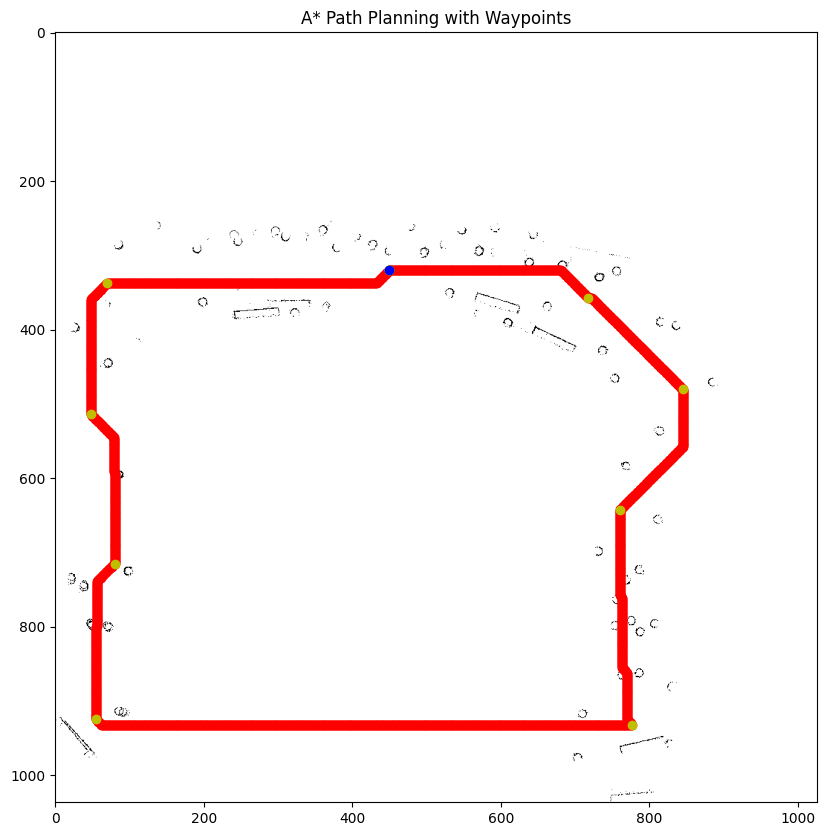

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

#Defining the Node class
class Node:
# init function intialises node with self, parent and cost values
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start to this node
        self.h = 0  # Heuristic cost from this node to goal
        self.f = 0  # Total cost

# eq function checks if two nodes are equal bases on their position
    def __eq__(self, other):
        return self.position == other.position

#lt i.e less than function compares based on their total cost
    def __lt__(self, other):
        return self.f < other.f


# Heuristic function to calcutate the h value (using manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* pathfinding function
def astar(grid, start, goal):
    # Defining directions for moving in the grid (8 directions)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    
    # Create open and closed lists
    open_list = []
    closed_list = set()
    
    # Adding the start node to the open list
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, None))
    
    # Setting the cost from start and the path
    g_costs = {start: 0}
    came_from = {start: None}
    
    while open_list:
        _, current_cost, current, parent = heapq.heappop(open_list)
        
        if current in closed_list:
            continue
        
        # Add the current node to the closed list and saving the path
        closed_list.add(current)
        came_from[current] = parent
        
        # Check if the goal is reached
        if current == goal:
            break
        
        # Checking and comparing with the neighbour nodes
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor[0], neighbor[1]] == 0 and neighbor not in closed_list:
                    if is_collision_free(grid, current, neighbor):
                        move_cost = np.sqrt(direction[0]**2 + direction[1]**2)
                        tentative_g_cost = current_cost + move_cost
                        if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                            g_costs[neighbor] = tentative_g_cost
                            f_cost = tentative_g_cost + heuristic(neighbor, goal)
                            heapq.heappush(open_list, (f_cost, tentative_g_cost, neighbor, current))
    
    # Redoing the path
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = came_from[node]
    path.reverse()
    
    return path

def is_collision_free(grid, start, end):
    """Check for collision-free path between start and end."""
    x0, y0 = start
    x1, y1 = end
    
    # Check intermediate points for diagonal moves
    if abs(x1 - x0) == 1 and abs(y1 - y0) == 1:
        if grid[x0, y1] == 1 or grid[x1, y0] == 1:
            return False
    
    return True

# Function to find path through waypoints
def find_path_with_waypoints(grid, start, waypoints, goal):
    full_path = []
    current_start = start
    
    for waypoint in waypoints:
        segment_path = astar(grid, current_start, waypoint)
        if segment_path[-1] != waypoint:
            raise ValueError(f"Cannot reach waypoint {waypoint}")
        full_path.extend(segment_path[:-1])  # avoid duplicating waypoints
        current_start = waypoint
    
    final_segment = astar(grid, current_start, goal)
    if final_segment[-1] != goal:
        raise ValueError(f"Cannot reach goal {goal}")
    full_path.extend(final_segment)
    
    return full_path

# Function to Plot
def visualize_path(grid, path, start, waypoints, goal):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='Greys', origin='upper')

    # Plot the path
    for point in path:
        plt.plot(point[1], point[0], 'ro')  # red dots

    # Highlight start, waypoints, and goal points
    plt.plot(start[1], start[0], 'go')  # green dot
    for waypoint in waypoints:
        plt.plot(waypoint[1], waypoint[0], 'yo')  # yellow dots
    plt.plot(goal[1], goal[0], 'bo')    # blue dot
    plt.title("A* Path Planning with Waypoints")
    plt.show()

# Example 
file_path = r'C:\Users\Lenovo\Desktop\python.exe\binary_occupancy_grid.npy'
grid = np.load(file_path)

start = (320,450)
waypoints = [(320,450),
            (337,70),
            (514,48),
            (715,80),
            (925,55),
            (932,777),
            (643,760),
            (480,845), 
            (357,718), 
            (320,450)]
             
goal = (320,450)
path = find_path_with_waypoints(grid, start, waypoints, goal)
visualize_path(grid, path, start, waypoints, goal)
